In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('heart_disease_dataset/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


##### age
##### sex
##### chest pain type (4 values)
##### resting blood pressure
##### serum cholestoral in mg/dl
##### fasting blood sugar > 120 mg/dl
##### resting electrocardiographic results (values 0,1,2)
##### maximum heart rate achieved
##### exercise induced angina
##### oldpeak = ST depression induced by exercise relative to rest
##### the slope of the peak exercise ST segment
##### number of major vessels (0-3) colored by flourosopy
##### thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
# Change the name of columns
df.rename(columns={'cp':'chest pain type', 'trestbps':'resting blood pressure', 'chol':'serum cholestrol', 'fbs':'fasting blood sugar', 'restecg':'resting ecg', 'thalach':'max heartrate',
       'exang':'exercise induced angina','ca':'number of major vessels','target':'heart risk'}, inplace=True)

In [12]:
df.head()

,age,sex,chest pain type,resting blood pressure,serum cholestrol,fasting blood sugar,resting ecg,max heartrate,exercise induced angina,oldpeak,slope,number of major vessels,thal,heart risk
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
print("Number of rows is :", df.shape[0])
print("Number of columns is :", df.shape[1])

Number of rows is : 1025
Number of columns is : 14


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1025 non-null   int64  
 1   sex                      1025 non-null   int64  
 2   chest pain type          1025 non-null   int64  
 3   resting blood pressure   1025 non-null   int64  
 4   serum cholestrol         1025 non-null   int64  
 5   fasting blood sugar      1025 non-null   int64  
 6   resting ecg              1025 non-null   int64  
 7   max heartrate            1025 non-null   int64  
 8   exercise induced angina  1025 non-null   int64  
 9   oldpeak                  1025 non-null   float64
 10  slope                    1025 non-null   int64  
 11  number of major vessels  1025 non-null   int64  
 12  thal                     1025 non-null   int64  
 13  heart risk               1025 non-null   int64  
dtypes: float64(1), int64(13)

In [11]:
# Finding null values
df.isna().sum().sum()

0

In [14]:
# Finding duplicates entries
df.duplicated().any()

True

In [15]:
# Droping duplicates
df.drop_duplicates(inplace = True)

In [16]:
df.duplicated().any()

False

In [17]:
df.shape

(302, 14)

In [18]:
df.describe()

,age,sex,chest pain type,resting blood pressure,serum cholestrol,fasting blood sugar,resting ecg,max heartrate,exercise induced angina,oldpeak,slope,number of major vessels,thal,heart risk
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Initial summary
- There are 302 entries and 14 columns in the data including the target variable.
- heart risk is the target column, value 1 means the patient is on heart risk otherwise not.
- All the columns are in numerical type with int64 and float64 as the datatype.
- No missing values and the duplicated values are handled.

#### Univariate analysis

<AxesSubplot: xlabel='heart risk', ylabel='count'>

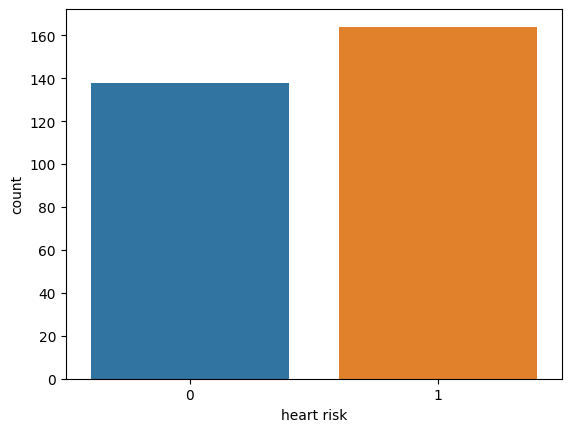

In [19]:
# Ploting the distribution of target variable
sns.countplot(data=df, x='heart risk')

In [20]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting blood pressure',
       'serum cholestrol', 'fasting blood sugar', 'resting ecg',
       'max heartrate', 'exercise induced angina', 'oldpeak', 'slope',
       'number of major vessels', 'thal', 'heart risk'],
      dtype='object')

In [23]:
continoues_numerical = df[['age', 'resting blood pressure', 'serum cholestrol', 'max heartrate']]
discreate_numerical = df[['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise induced angina', 'oldpeak', 'slope',
       'number of major vessels', 'thal']]

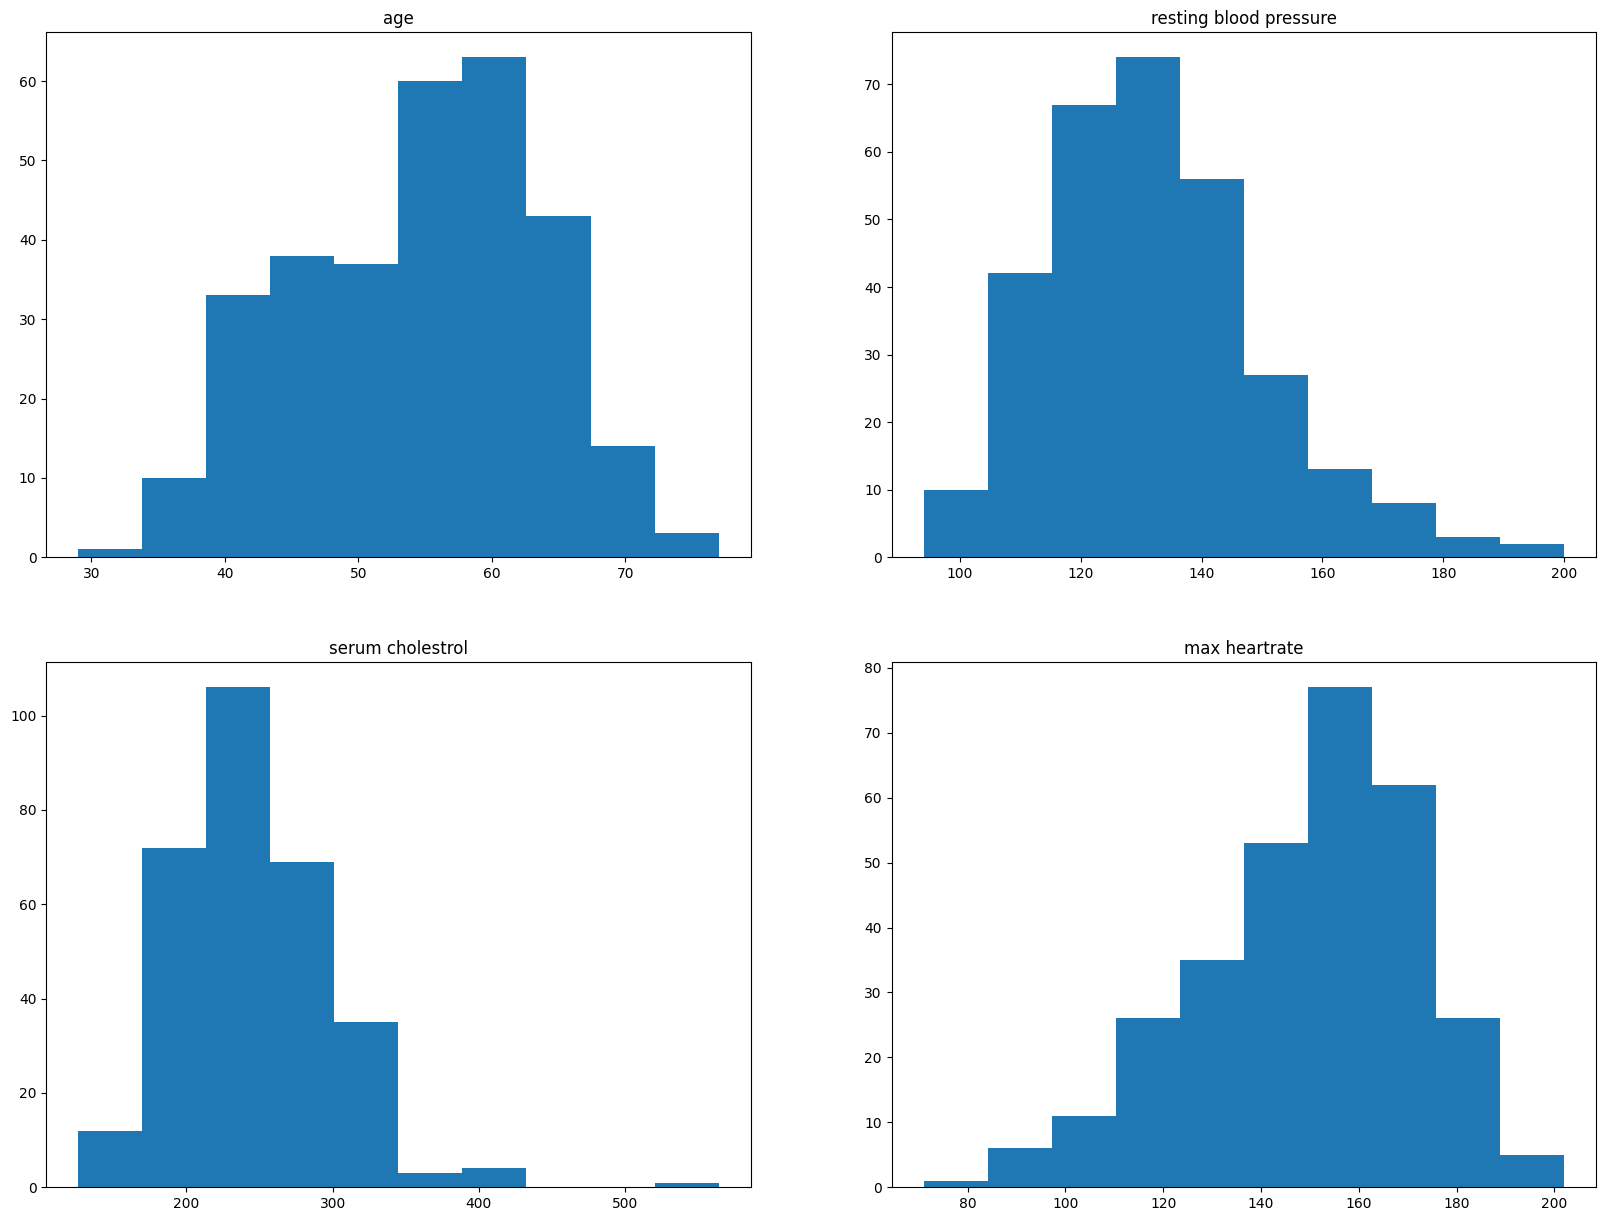

In [25]:
# Ploting histogram for contionues numerical feature to see the distribution
plt.figure(figsize=(20, 15))
for i, feature in enumerate(continoues_numerical.columns):
    plt.subplot(2, 2, i+1)
    plt.hist(continoues_numerical[feature])
    plt.title(feature)
plt.show()

#### Insights:
- The data distribution of age is in between 27 to 75. The heart risk is mostly we would see in old people, but now a days there are more young people also suffer from heart risk at young ages.
- The optimal level of resting blood pressure is less than 120/80mg. The person is at high risk if it is greater than 140/90mg and inbetween these the person is at increased risk.The distribution is mostly concentrated between 120 to 150 they are at increased risk and even though it ranges to 200 which is very risky.
- The optimal level of serum cholesterol is less than 200. The rate above this increases the heart risk. The distribution also contain lot of data that is greater than 200.
- The max heart rate is positively skewed in this case. Because the max heart rate has a relationship with the age of the person. It is given by 220-age of the person. From the distribution we can't able to say any assumption because it is related to many other factors.

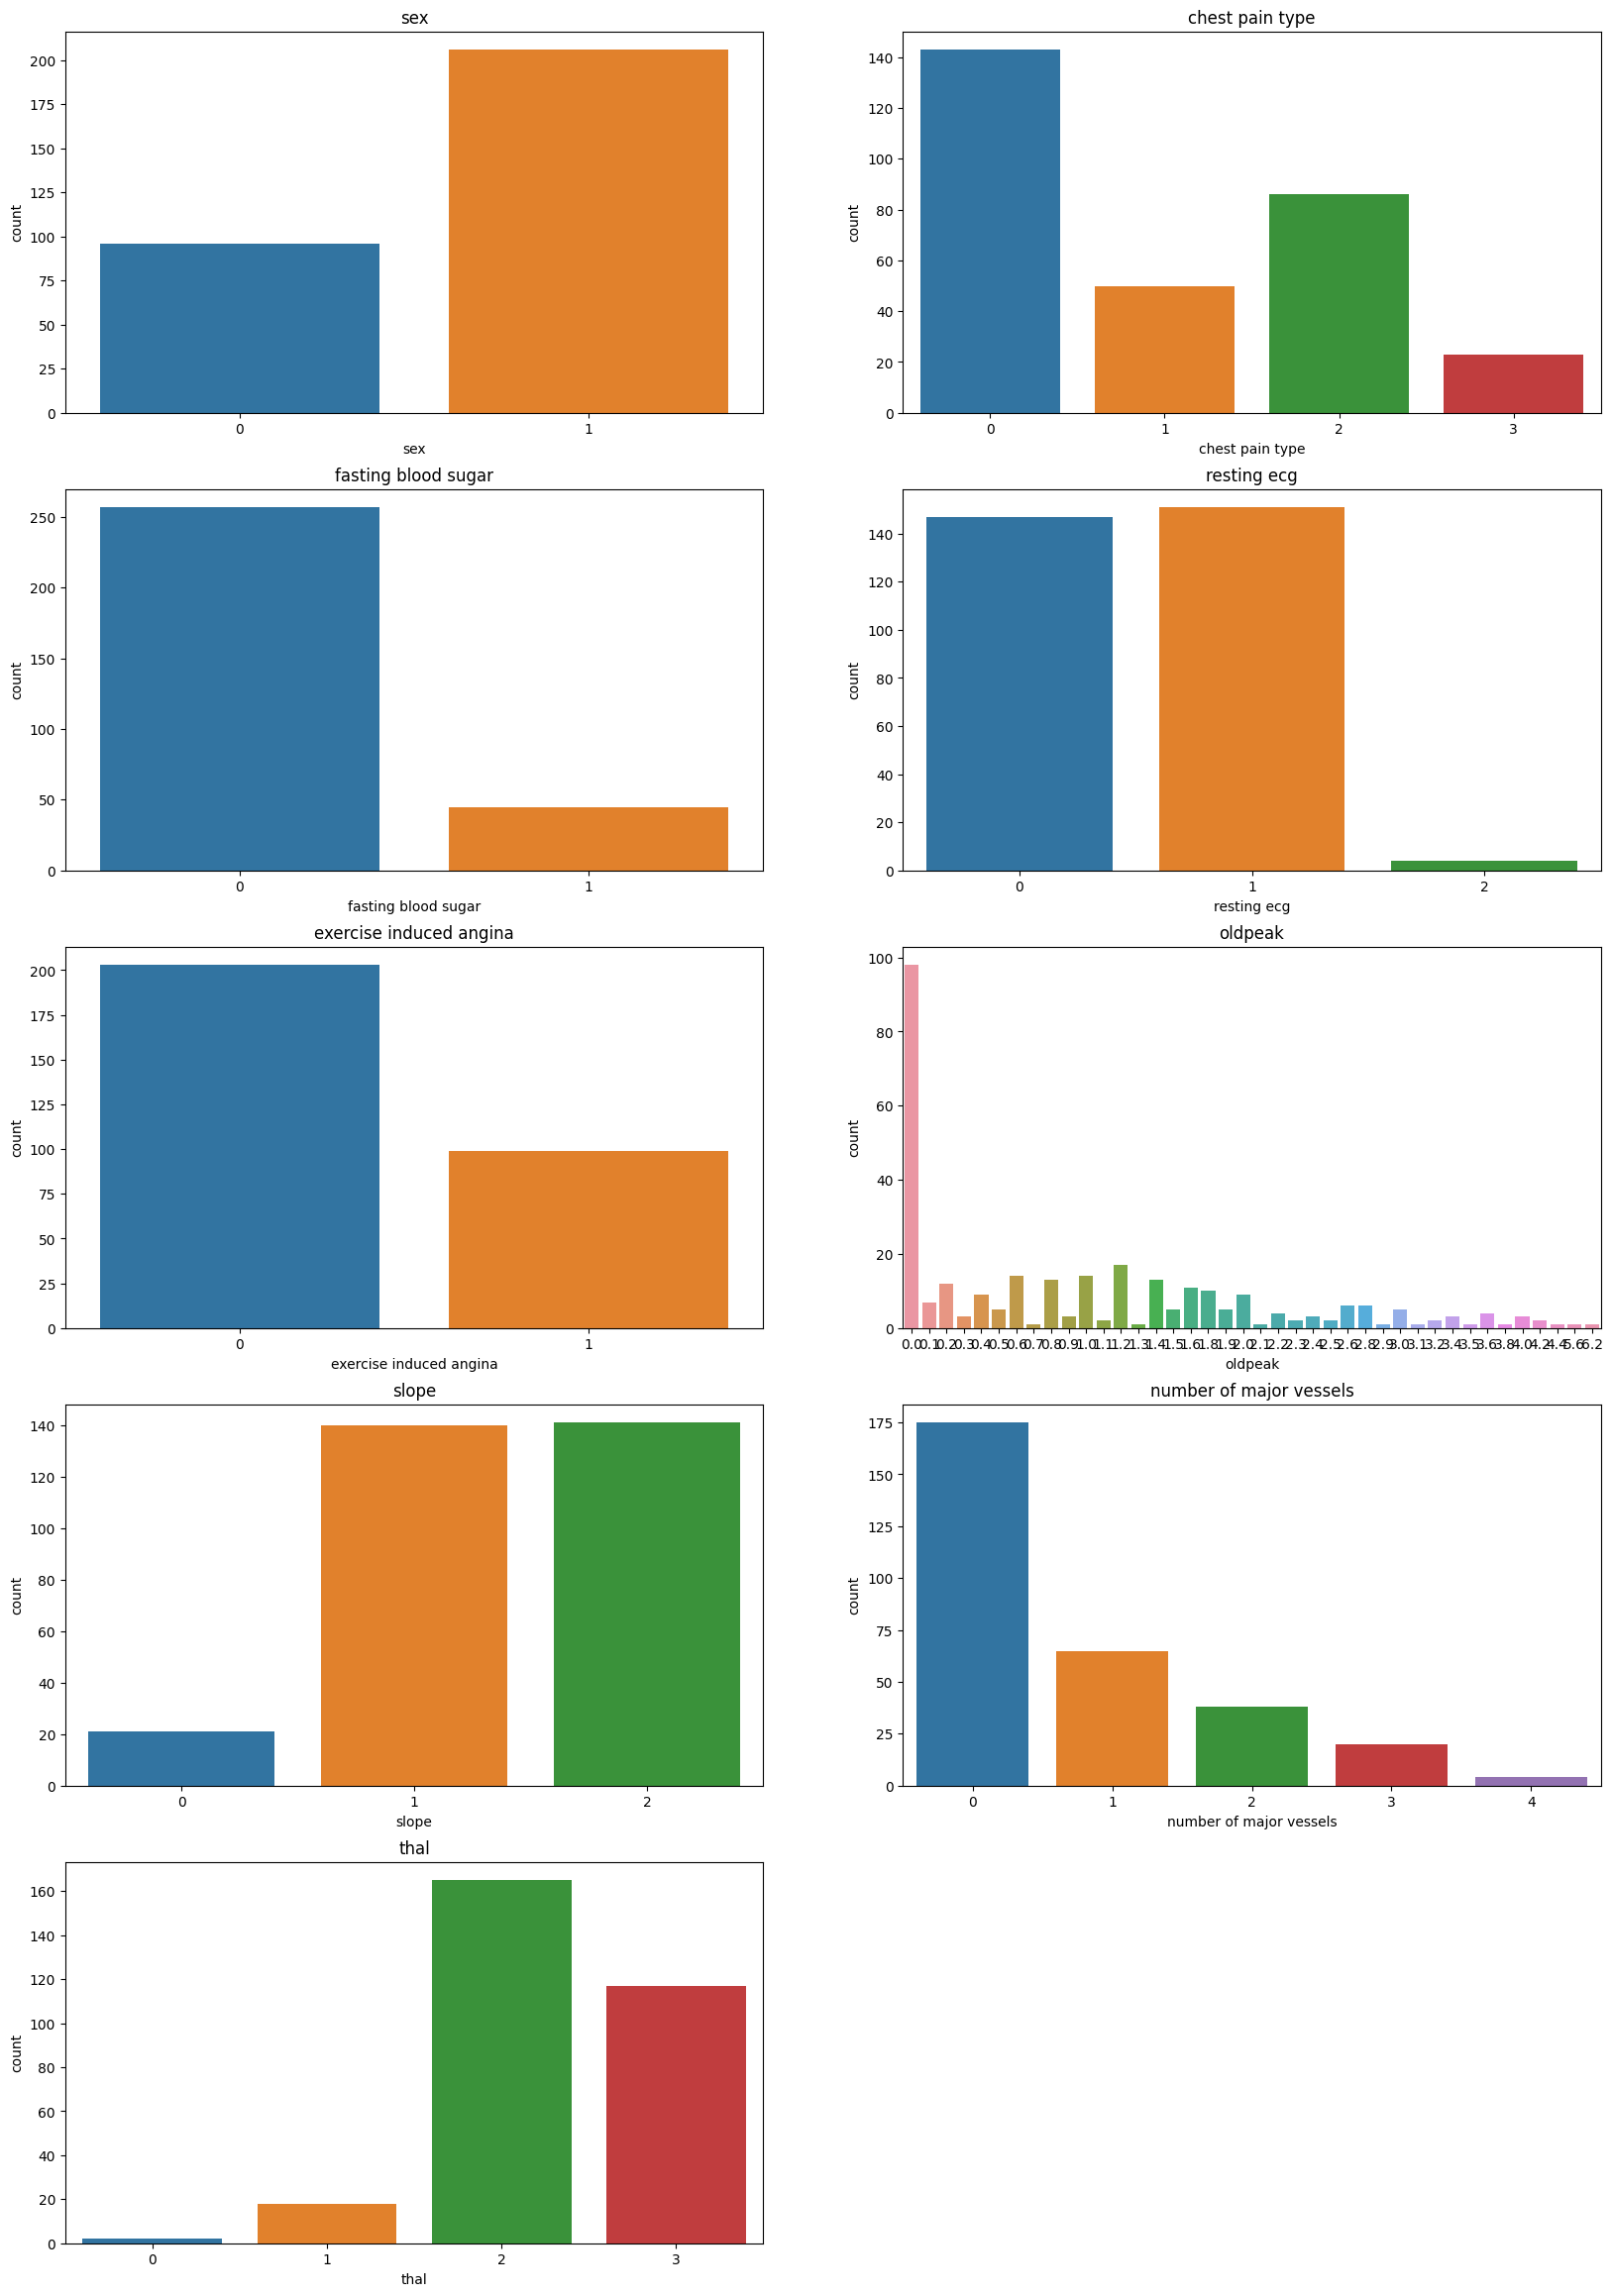

In [32]:
# Ploting count plot for discreate numerical variables
plt.figure(figsize=(20,29))
for i, feature in enumerate(discreate_numerical.columns):
    plt.subplot(5, 2, i+1)
    sns.countplot(data=discreate_numerical, x=feature)
    plt.title(feature)

#### Insights:
- The distribution of sex is biased to one side. The number of females are more than males
- The type 1 chest pain is more for most of the cases and is followed by 3.
- Most of the people not have fasting blood sugar level. 
- Most of the person have reversable defect.

#### Bivariate analysis

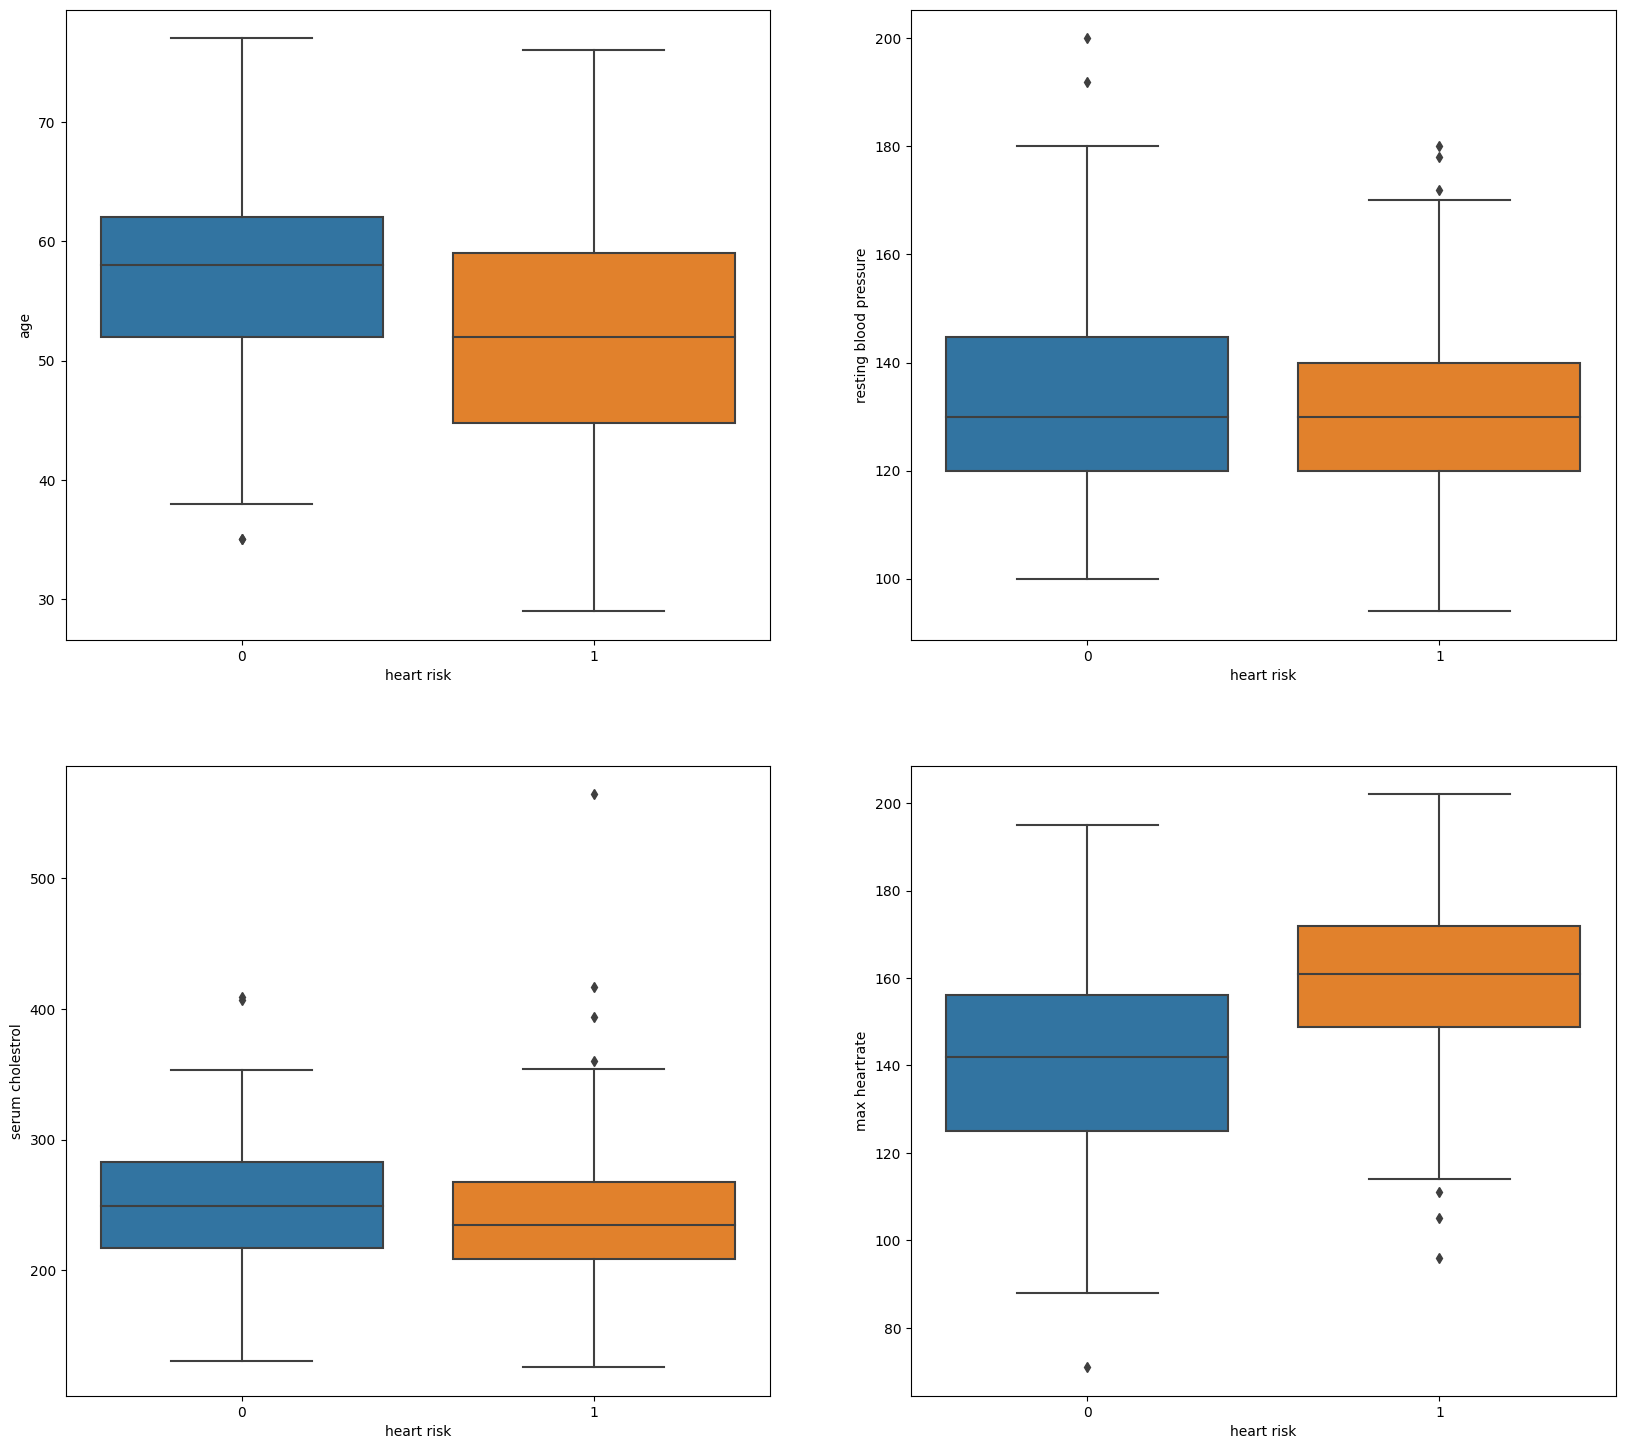

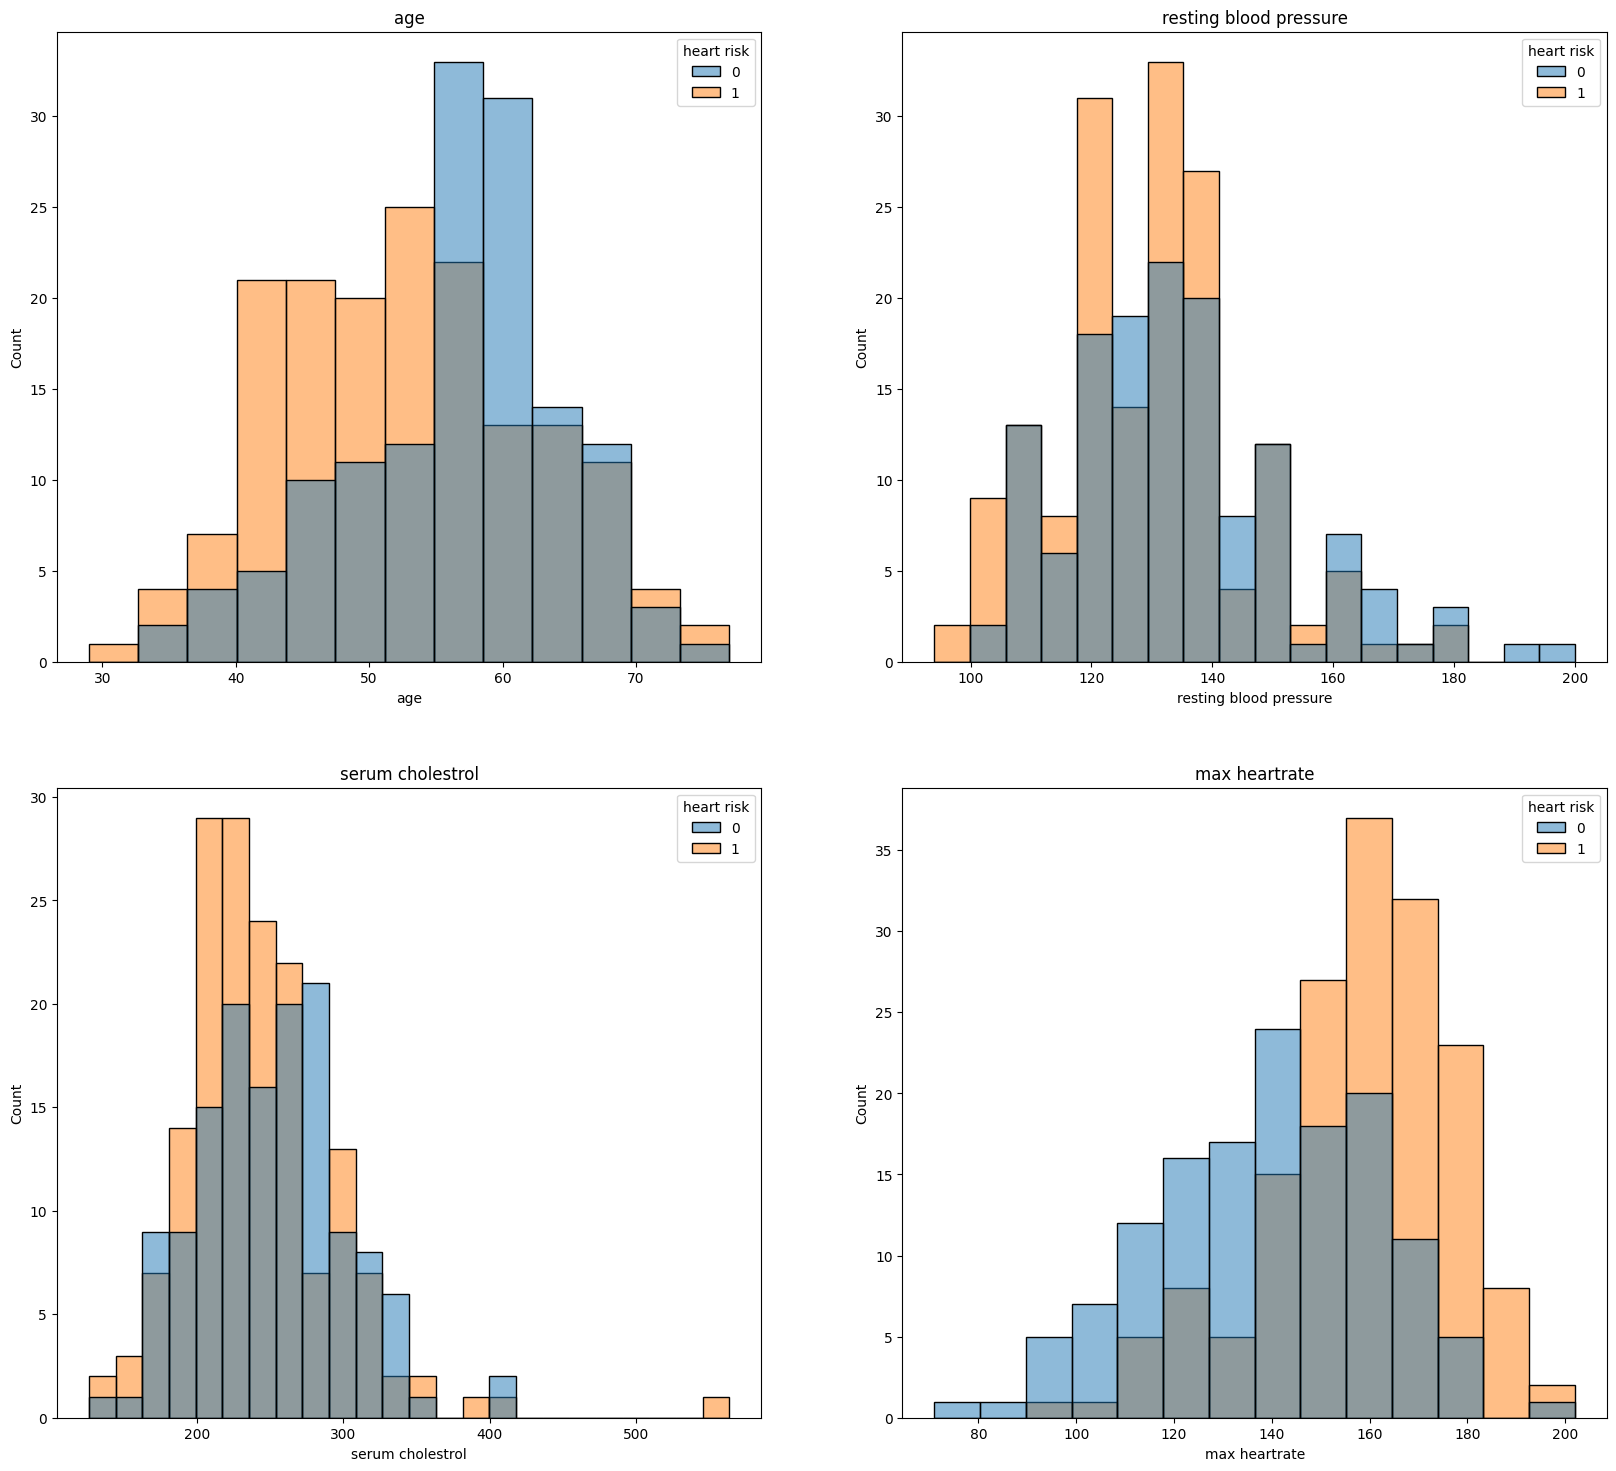

In [46]:
plt.figure(figsize=(20, 18))
for i, feature in enumerate(continoues_numerical.columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=feature, x='heart risk', data = df)
plt.show()
plt.figure(figsize=(20, 18))
for i, feature in enumerate(continoues_numerical.columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=feature, hue='heart risk', data = df)
    plt.title(feature)
plt.show()

#### Insights:
- From the age boxplot and histplot, its show that the chance of heart disease is not depends on the age now a days. There is a large variation in the age for people who had a risk of heart diseases. Even people below 30 have this.
- From resting blood pressure we can able to tell that how resting blood is related to heart risk, even though people have resting blood above the normal limit  and below it are also affected by heart disease.
- From the serum cholestrol plot. The boxplot shows that the median of the heart risk falls below that have not risk. But if the rate is above the limit of 200 the chance of heart risk is high.
- From max heart rate it is evident that the increase in the heart rate the person is affected by heart risk.

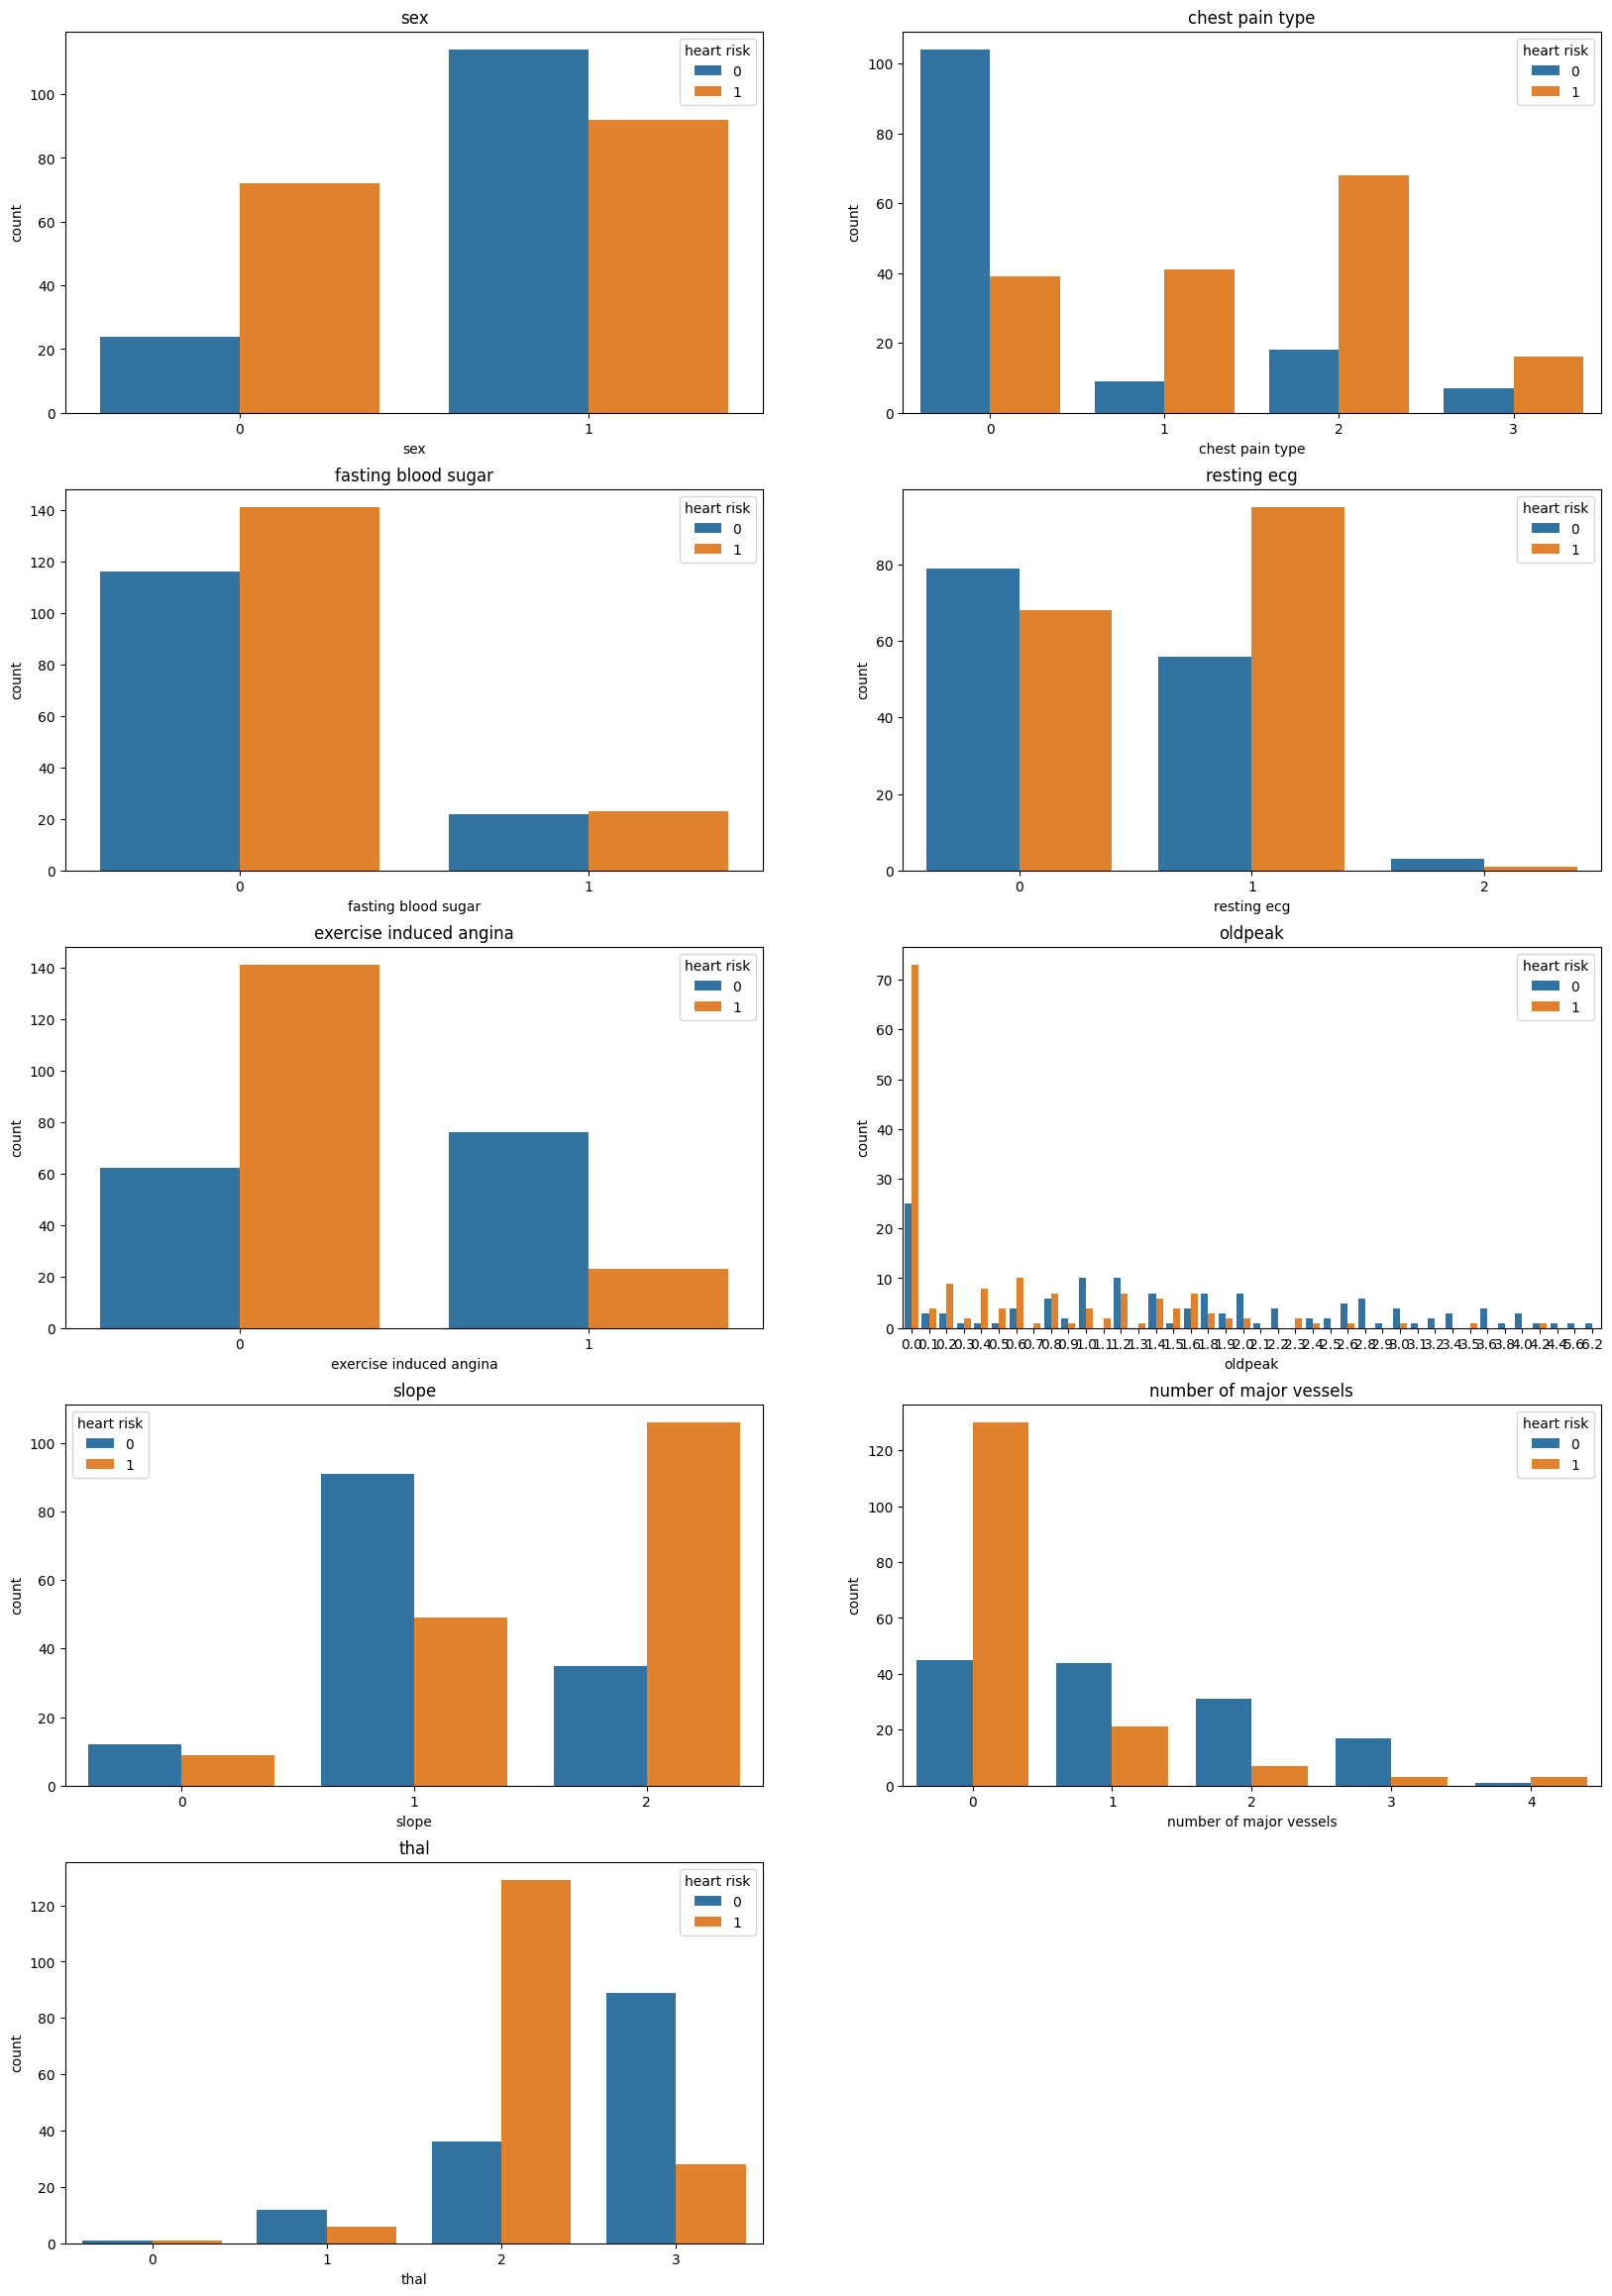

In [47]:
# Ploting count plot for discreate numerical variables
plt.figure(figsize=(20,29))
for i, feature in enumerate(discreate_numerical.columns):
    plt.subplot(5, 2, i+1)
    sns.countplot(data=discreate_numerical, hue=df['heart risk'], x=feature)
    plt.title(feature)

##### Insights:

- The sex distribution the distribution of female is double the number of males. But more than 75% of the male from that is at heart disease risk. where in the case of female is less than the half.
- People with chest pain 1, 2, 3 have high risk of heart disease.
- If no fasting blood sugar, then there is more chance of heart disease.
- Ecg is less then there is a risk of heart disease.
- The exersice induced angina is less then high heart disease risk.
- If old peak is 0 then high heart risk and if it goes from 1 to positive the risk decreases.
- If the slope of ST segment is 2 then high risk of heart risk.
- The number of major vessel is 0 then the person has a high heart disease risk.
- If the person has fixed defect on thal, then the heart disease risk is high.

#### multivariate analysis

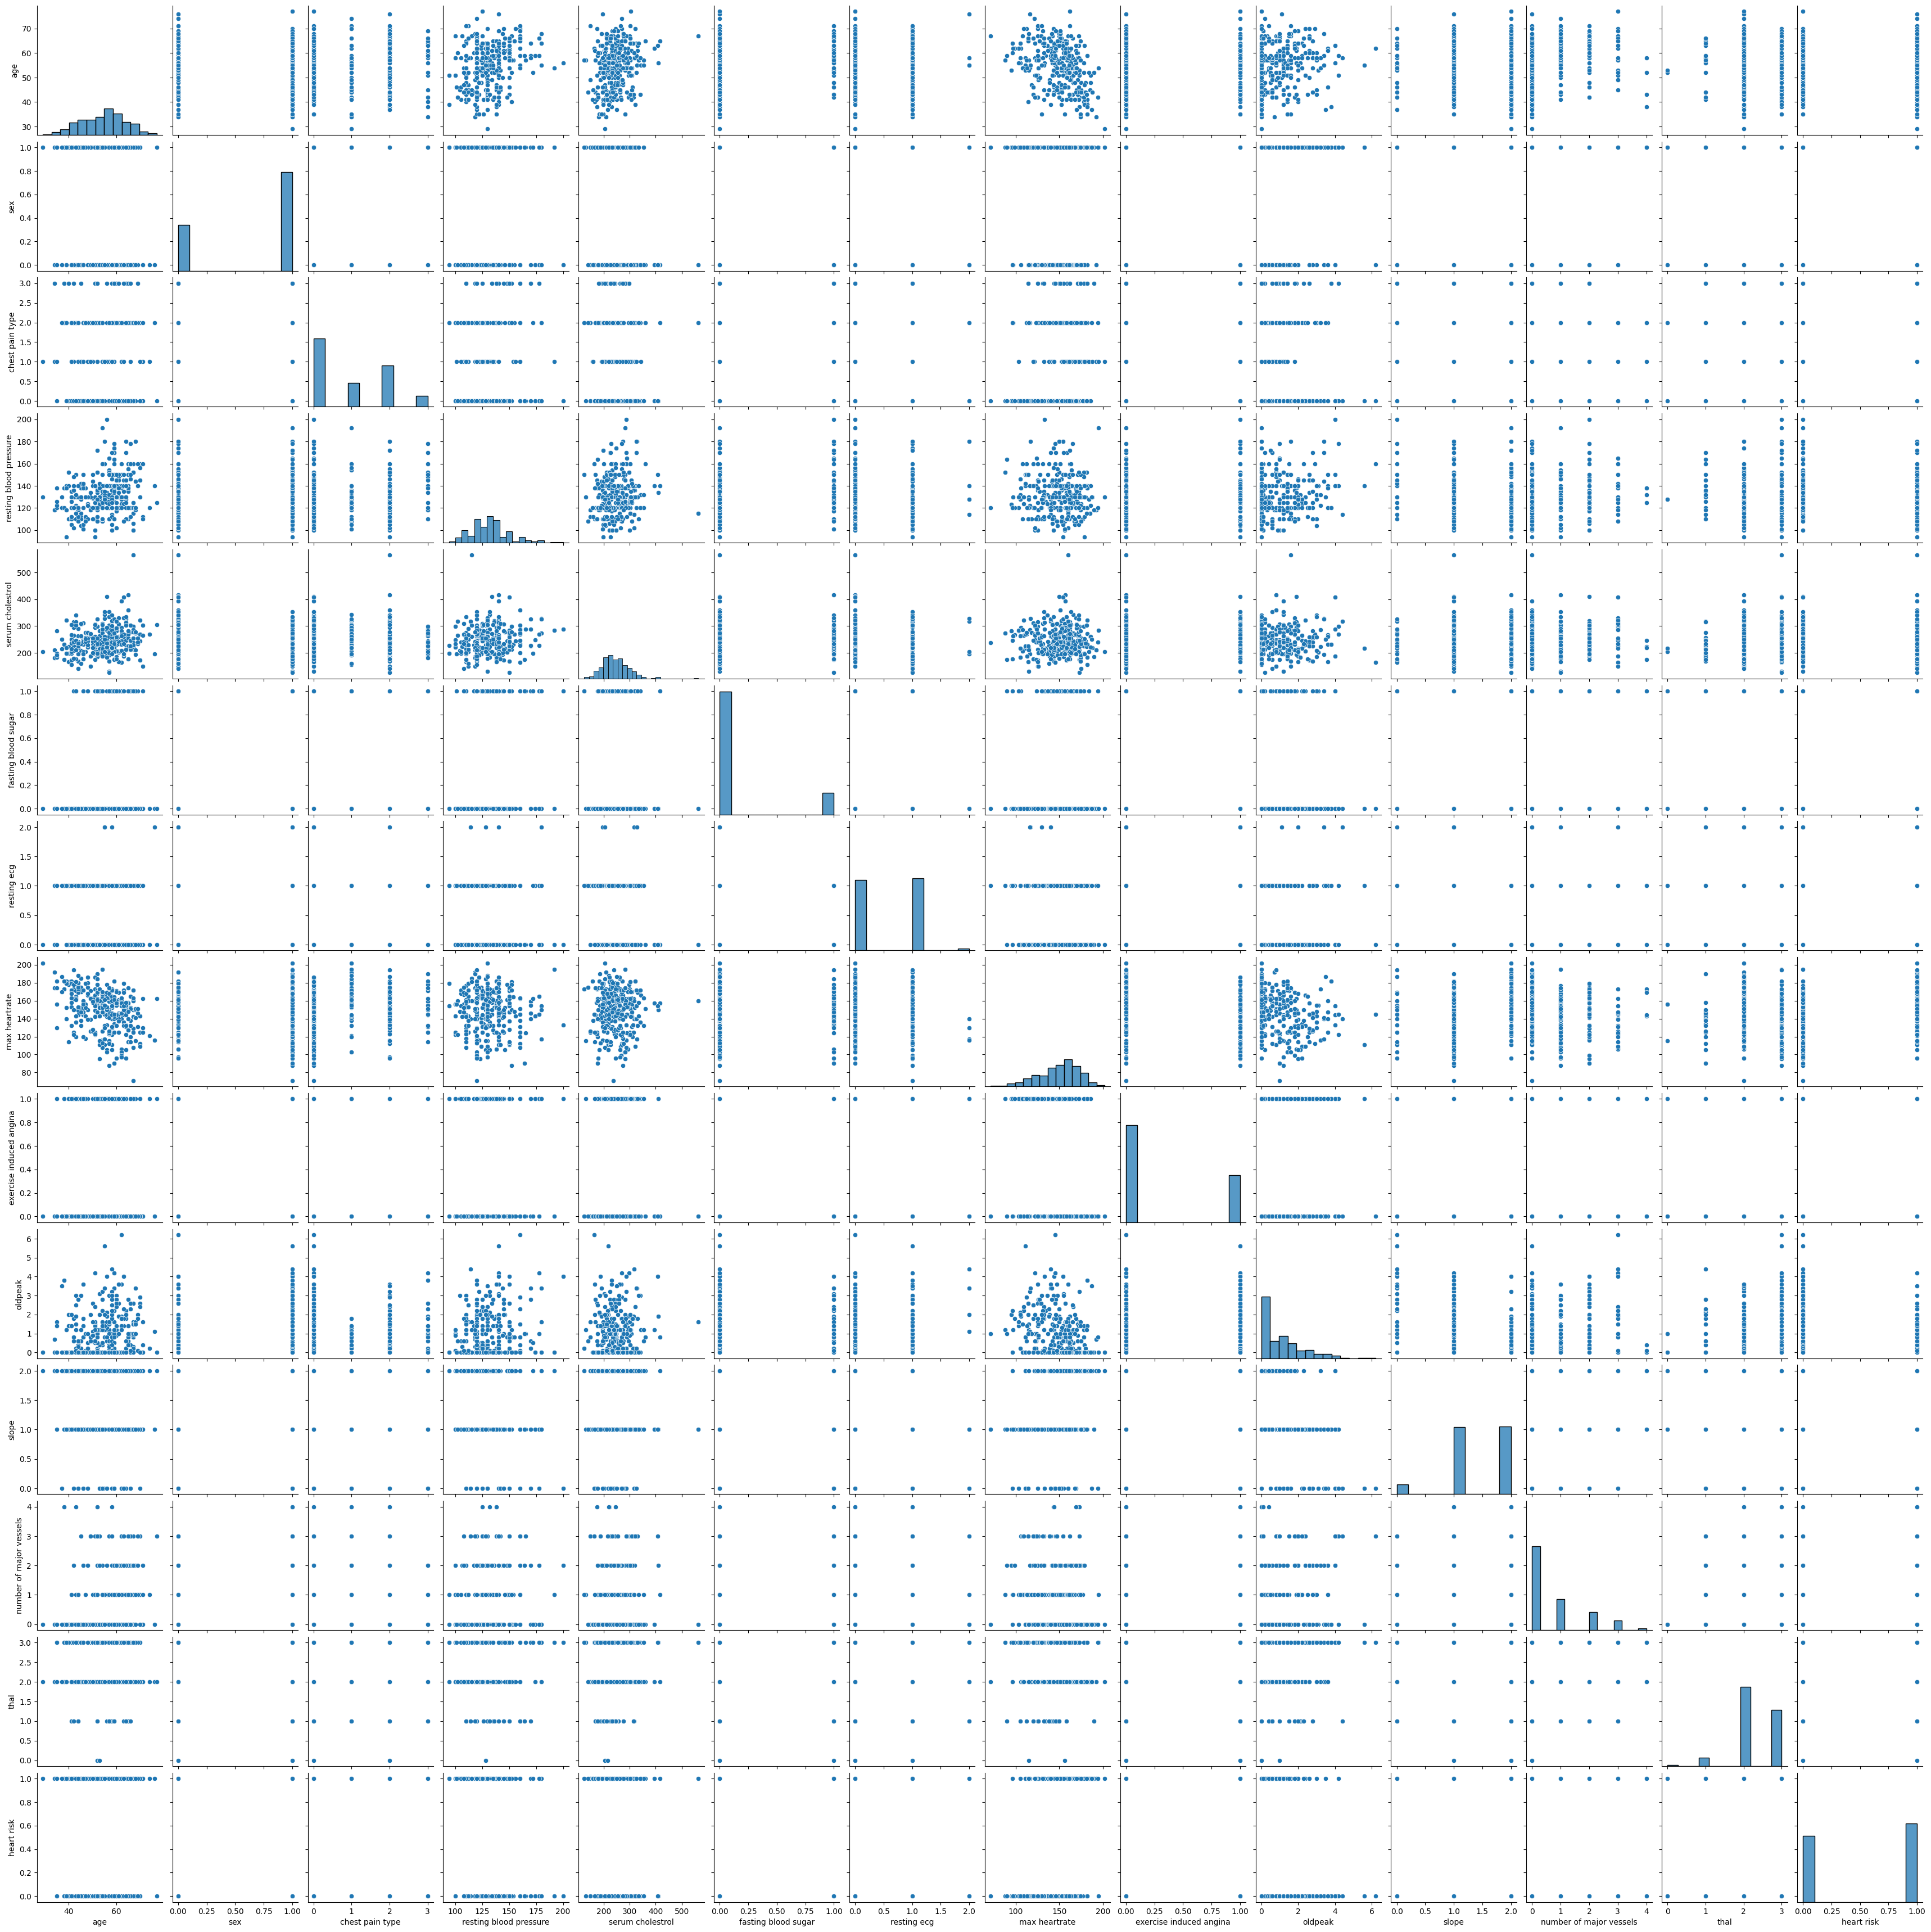

In [50]:
sns.pairplot(df)

<AxesSubplot: >

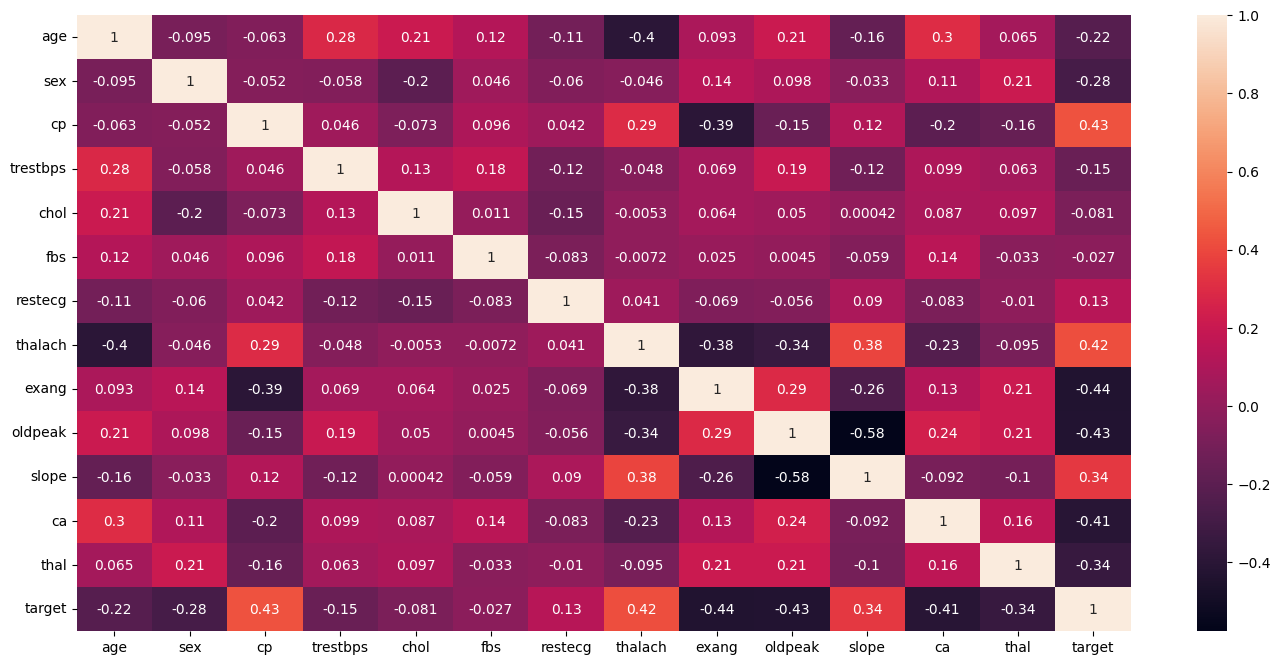

In [52]:
plt.figure(figsize = (17, 8))
sns.heatmap(df.corr(),annot=True)
